# Hidroinformatics System - Numeric Methods
## Homework
### Juan David Rodriguez

## 1. Compound Channel

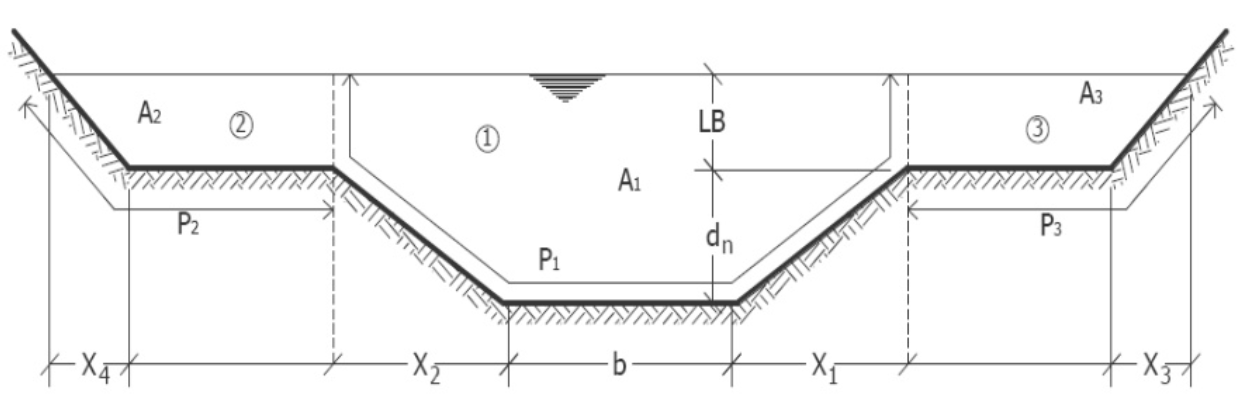

In [1]:
## import library python

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### ➣Hydraulic Area Plot

Enter the main channel width, b(m): 2
Enter the entire channel width, b(m)': 5
Enter the main channel depth, ym(m): 1
Enter the main channel section slope, z1: .5
Enter the entire channel section slope, z2: 1
Enter the total channel depth, y(m): 2


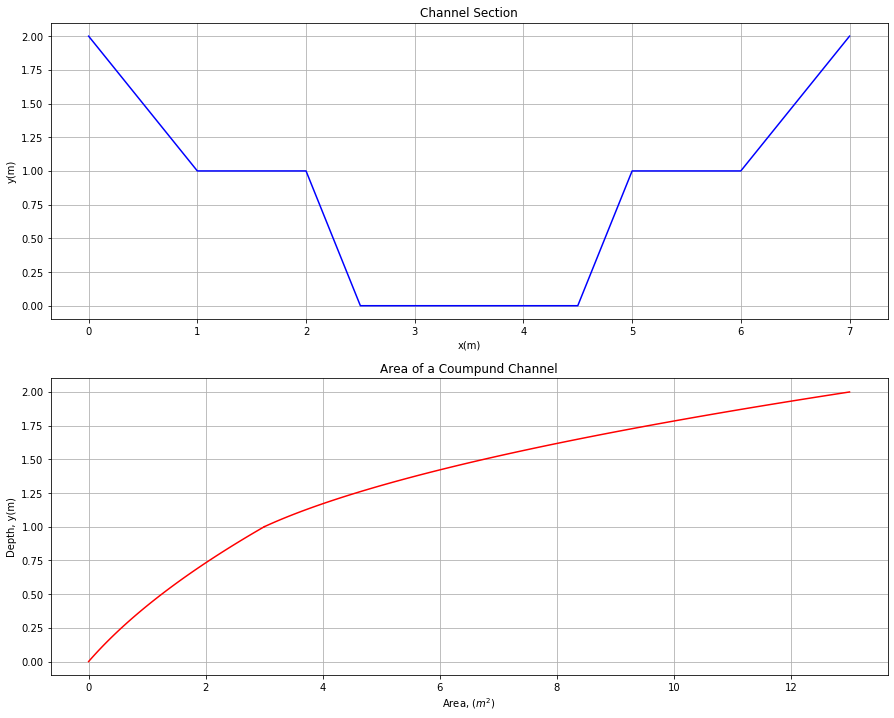

In [6]:
b=float(input("Enter the main channel width, b(m): "))
bv=float(input("Enter the entire channel width, b(m)': "))
ym=float(input("Enter the main channel depth, ym(m): "))
z1=float(input("Enter the main channel section slope, z1: "))
z2=float(input("Enter the entire channel section slope, z2: "))
yi=float(input("Enter the total channel depth, y(m): "))
T1=b+2*ym*z1
T2=bv+2*(yi-ym)*z2

geox=[0,z2*(yi-ym),z2*(yi-ym)+(bv-T1)/2,z2*(yi-ym)+(bv-T1)/2+ym*z1,z2*(yi-ym)+(bv-T1)/2+ym*z1+b,z2*(yi-ym)+(bv-T1)/2+T1,T2-z2*(yi-ym),T2
]
geoy=[yi,ym,ym,0,0,ym, ym,yi]

plt.figure(figsize=(15,12))
plt.subplot(211)
plt.plot(geox,geoy,'b')
plt.grid(True)
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.title('Channel Section')

def Ar1(b,bv,ym,z1,z2):
         return(b*(ym+((ym**2)*z1)))
    
def Ar2(b,bv,ym,z1,z2,y):
        return((b*(ym+((ym**2)*z1)))+(bv*((y-ym)+(((y-ym)**2))*z2)))

y1 = np.arange(0.0, ym+0.01, 0.01)
y2 = np.arange(ym, yi+0.01, 0.01)
Area1=Ar1(b,bv,y1,z1,z2)
Area2=Ar2(b,bv,ym,z1,z2,y2)

plt.subplot(212)
plt.plot(Area1,y1,'r')
plt.plot(Area2,y2,'r')
plt.xlabel('Area, $(m^2)$')
plt.ylabel('Depth, y(m)')
plt.title('Area of a Coumpund Channel')
plt.grid(True)


### ➣ Energy Plot

C:\Users\P70\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


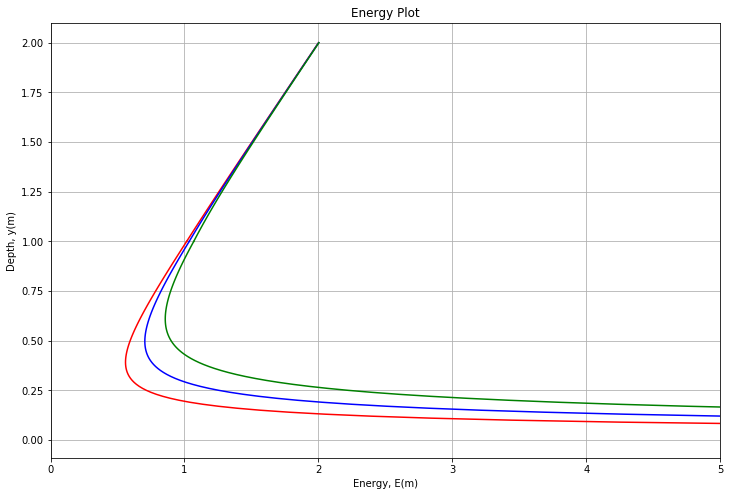

In [7]:
## Plot flow vs. depth

Qlist=[1.7,2.5,3.5]
α=1.
θ=0

def Ener (θ,α,Q,A,y):
         return(y*np.cos(θ)+(α*(Q**2)/(2*9.81*(A**2))))
    
E1=Ener(θ,α,Qlist[0],Ar1(b,bv,y1,z1,z2),y1)
E2=Ener(θ,α,Qlist[1],Ar1(b,bv,y1,z1,z2),y1)
E3=Ener(θ,α,Qlist[2],Ar1(b,bv,y1,z1,z2),y1)
E1a=Ener(θ,α,Qlist[0],Ar2(b,bv,ym,z1,z2,y2),y2)
E2a=Ener(θ,α,Qlist[1],Ar2(b,bv,ym,z1,z2,y2),y2)
E3a=Ener(θ,α,Qlist[2],Ar2(b,bv,ym,z1,z2,y2),y2)

plt.figure(figsize=(12,8))
plt.plot(E1,y1,'r',E2,y1,'b',E3,y1,'g',E1a,y2,'r',E2a,y2,'b',E3a,y2,'g')
plt.xlim(0,5)
plt.xlabel('Energy, E(m)')
plt.ylabel('Depth, y(m)')
plt.title('Energy Plot')
plt.grid(True)

### ➣ Critical Depth

In [8]:
from scipy import optimize
from scipy.optimize import bisect
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import newton
α=1.
θ=0

#Mínimo con herramienta optimize de scipy

print("PARA EL CAUDAL 1")

def EEner (y):
         return(y*np.cos(θ)+(α*(Qlist[0]**2)/(2*9.81*(Ar1(b,bv,y,z1,z2)**2))))

    
yc = optimize.fmin(EEner, 1)    
print("\nCritical Depth with optimize.fmin is: ",yc, ". The minimum Energy is: ",EEner(yc))
yc1 = newton(EEner , 0.1)
print("Critical Depth with optimize.newton is: ",yc1, ". The minimum Energy is: ",EEner(yc1))
yc2 = fsolve (EEner , 0.1 )
print("Critical Depth with optimize.fsolve is: ",yc2, ". The minimum Energy is: ",EEner(yc2))

print("\n PARA EL CAUDAL 2")

def EEner (y):
         return(y*np.cos(θ)+(α*(Qlist[1]**2)/(2*9.81*(Ar1(b,bv,y,z1,z2)**2))))

    
yc = optimize.fmin(EEner, 1)    
print("\nCritical Depth with optimize.fmin is: ",yc, ". The minimum Energy is: ",EEner(yc))
yc1 = newton(EEner , 0.1)
print("Critical Depth with optimize.newton is: ",yc1, ". The minimum Energy is: ",EEner(yc1))
yc2 = fsolve (EEner , 0.1 )
print("Critical Depth with optimize.fsolve is: ",yc2, ". The minimum Energy is: ",EEner(yc2))

print("\n PARA EL CAUDAL 3")

def EEner (y):
         return(y*np.cos(θ)+(α*(Qlist[2]**2)/(2*9.81*(Ar1(b,bv,y,z1,z2)**2))))

    
yc = optimize.fmin(EEner, 1)    
print("\nCritical Depth with optimize.fmin is: ",yc, ". The minimum Energy is: ",EEner(yc))
yc1 = newton(EEner , 0.5)
print("Critical Depth with optimize.newton is: ",yc1, ". The minimum Energy is: ",EEner(yc1))
yc2 = fsolve (EEner , 0.1 )
print("Critical Depth with optimize.fsolve is: ",yc2, ". The minimum Energy is: ",EEner(yc2))



PARA EL CAUDAL 1
Optimization terminated successfully.
         Current function value: 0.559533
         Iterations: 15
         Function evaluations: 30

Critical Depth with optimize.fmin is:  [0.39140625] . The minimum Energy is:  [0.55953292]
Critical Depth with optimize.newton is:  -0.3834130607155312 . The minimum Energy is:  1.1102230246251565e-16
Critical Depth with optimize.fsolve is:  [0.39142419] . The minimum Energy is:  [0.55953293]

 PARA EL CAUDAL 2
Optimization terminated successfully.
         Current function value: 0.703838
         Iterations: 15
         Function evaluations: 30

Critical Depth with optimize.fmin is:  [0.49667969] . The minimum Energy is:  [0.70383809]
Critical Depth with optimize.newton is:  -0.5277144266478742 . The minimum Energy is:  3.6359804056473877e-13
Critical Depth with optimize.fsolve is:  [0.49682801] . The minimum Energy is:  [0.70383815]

 PARA EL CAUDAL 3
Optimization terminated successfully.
         Current function value: 0.856317